<h1 style="color:red;"><strong>0. Look at the big Picture</h1>

<h2 style="color:yellow;">0.1 Frame the Problems</h2>

* What's the business objective
Building a model to predict car prices at Toyota addresses the key business challenge of optimizing pricing strategy to remain competitive in the market. This ensures that Toyota can set accurate and attractive prices for its vehicles, maximizing profitability while attracting and retaining customers in a highly competitive automotive industry.

* How does the company expect to use and benefit from the model?
The company expects to use the model to set competitive prices for its vehicles, maximize profitability, and attract more customers. The engineering team will collect data and predict the price using the model

* Frame problems --> chose algorithm --> performance measure --> ways/time to tune the model

<h2 style="color:yellow;">0.2 Chose performance measure (Loss)</h2>


* RMSE

<h2 style="color:yellow;">0.3 Chose performance measure (Metrics)</h2>

* Adjusted r^2

<h2 style="color:yellow;">0.4 Check the Assumptions</h2>

In [197]:
#install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize

<h1 style="color:red;"><strong>1. Get the Data</h1>

In [345]:
# Read data
df = pd.read_csv("toyota_corolla.csv")

In [346]:
# Take a look at the top 5 rows
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [348]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1 style="color:red;"><strong>2. Data Cleaning for EDA</h1>

<h2 style="color:yellow;">2.1 Formating</h2>

### 2.1.1 Format column names

In [349]:
# Format Column name
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [350]:
df = rename_columns(df)

In [351]:
df.head(1)

,id,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0


In [352]:
df.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar'],
      dtype='object')

### 2.1.2 Format data body

In [353]:
df.apply(lambda col: col.unique())

id                   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
model                [Corolla 2.0 D4D HATCHB TERRA 2/3-Doors, Corol...
price                [13500, 13750, 13950, 14950, 12950, 16900, 186...
age_08_04            [23, 24, 26, 30, 32, 27, 25, 22, 31, 28, 29, 2...
mfg_month                      [10, 9, 7, 3, 1, 6, 8, 11, 2, 5, 4, 12]
mfg_year                    [2002, 2003, 2004, 2001, 2000, 1999, 1998]
km                   [46986, 72937, 41711, 48000, 38500, 61000, 946...
fuel_type                                        [Diesel, Petrol, CNG]
hp                   [90, 192, 69, 110, 97, 71, 116, 98, 86, 72, 10...
met_color                                                       [1, 0]
color                [Blue, Silver, Black, White, Grey, Red, Green,...
automatic                                                       [0, 1]
cc                   [2000, 1800, 1900, 1600, 1400, 1598, 16000, 19...
doors                                                     [3, 5, 4, 2]
cylind

In [354]:
# everything is formatted carefully --> no need to format further

### 2.1.3 Format Datatypes
After we format all the data body and columns, let's format the data types

In [355]:
# datatypes has been formatted correctly --> no need to format further
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1436 non-null   int64 
 1   model              1436 non-null   object
 2   price              1436 non-null   int64 
 3   age_08_04          1436 non-null   int64 
 4   mfg_month          1436 non-null   int64 
 5   mfg_year           1436 non-null   int64 
 6   km                 1436 non-null   int64 
 7   fuel_type          1436 non-null   object
 8   hp                 1436 non-null   int64 
 9   met_color          1436 non-null   int64 
 10  color              1436 non-null   object
 11  automatic          1436 non-null   int64 
 12  cc                 1436 non-null   int64 
 13  doors              1436 non-null   int64 
 14  cylinders          1436 non-null   int64 
 15  gears              1436 non-null   int64 
 16  quarterly_tax      1436 non-null   int64 


<h1 style="color:red;"><strong>3. Attribute Combination</h1>

In [356]:
# Skip, already enough attributes

<h1 style="color:red;"><strong> 4. EDA</h1>

In [357]:
df.select_dtypes(include=['object'])

,model,fuel_type,color
0,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
1,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Silver
2,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
3,Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Black
4,Corolla 2.0 D4D HATCHB SOL 2/3-Doors,Diesel,Black
...,...,...,...
1431,Corolla 1.3 16V HATCHB G6 2/3-Doors,Petrol,Blue
1432,Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,Petrol,Grey
1433,Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,Petrol,Blue
1434,Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,Petrol,Grey


In [358]:
cat_attribs = ['model', 'fuel_type', 'color']
bin_attribs = [col for col in df.columns if len(df[col].unique()) == 2 or len(df[col].unique()) == 1]
num_attribs = [col for col in df.columns if col not in cat_attribs and col not in bin_attribs and col != 'id']

## 4.1 Univariate

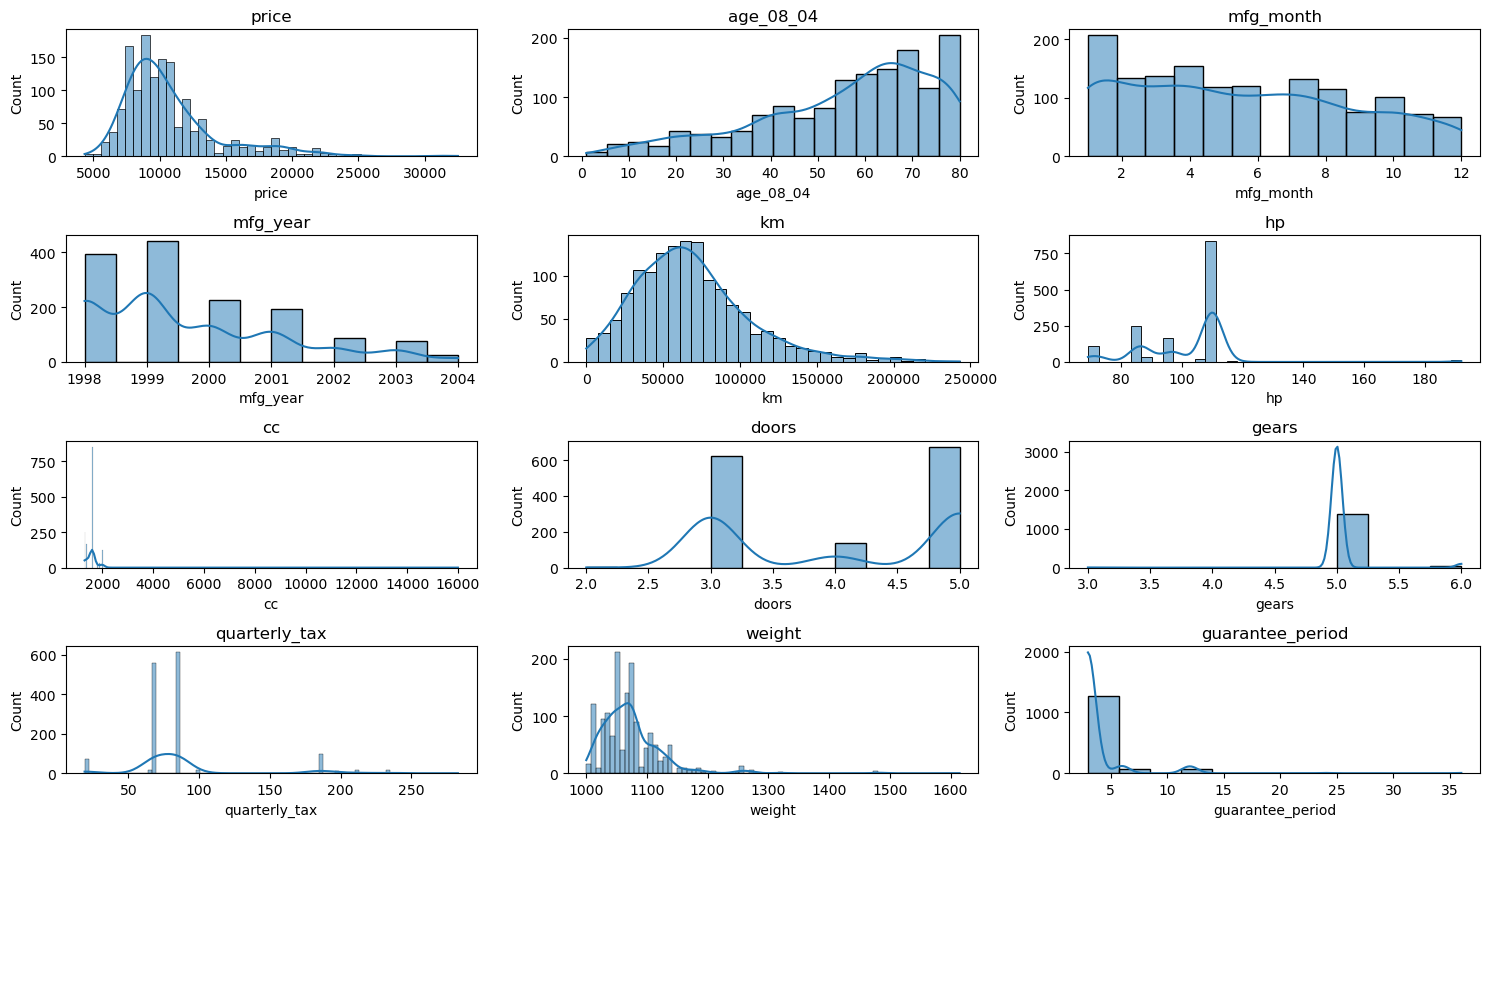

In [359]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(num_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over numerical attributes
axes = axes.flatten()

# Iterate over numerical attributes and plot histograms
for i, column in enumerate(num_attribs):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

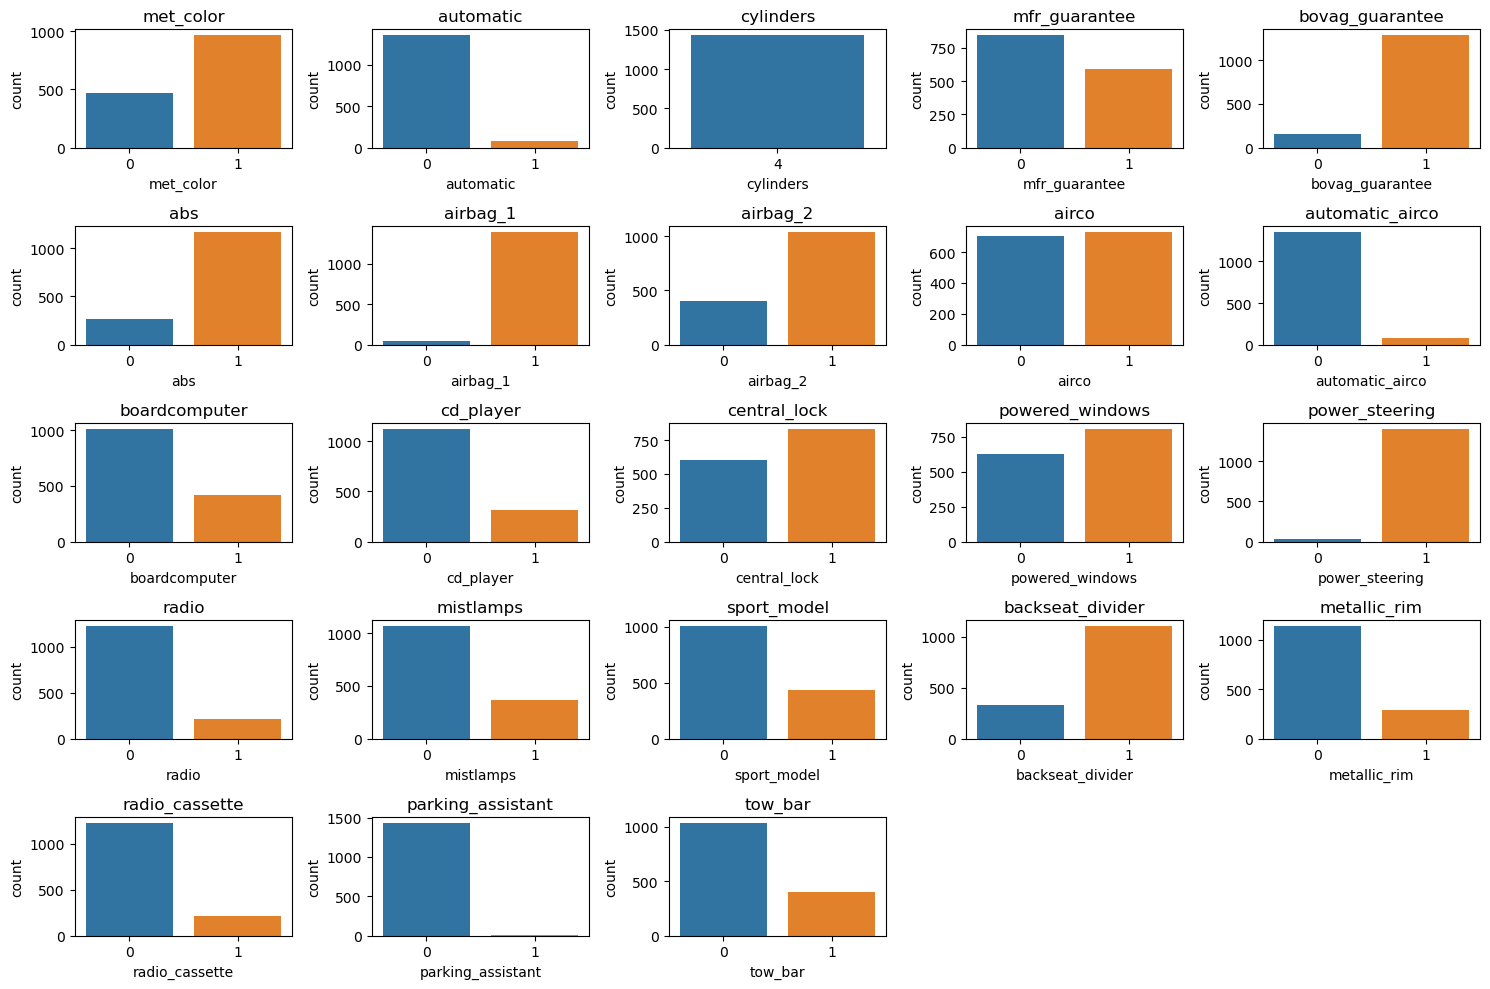

In [360]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(bin_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over binary attributes
axes = axes.flatten()

# Iterate over binary attributes and plot bar graphs
for i, column in enumerate(bin_attribs):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

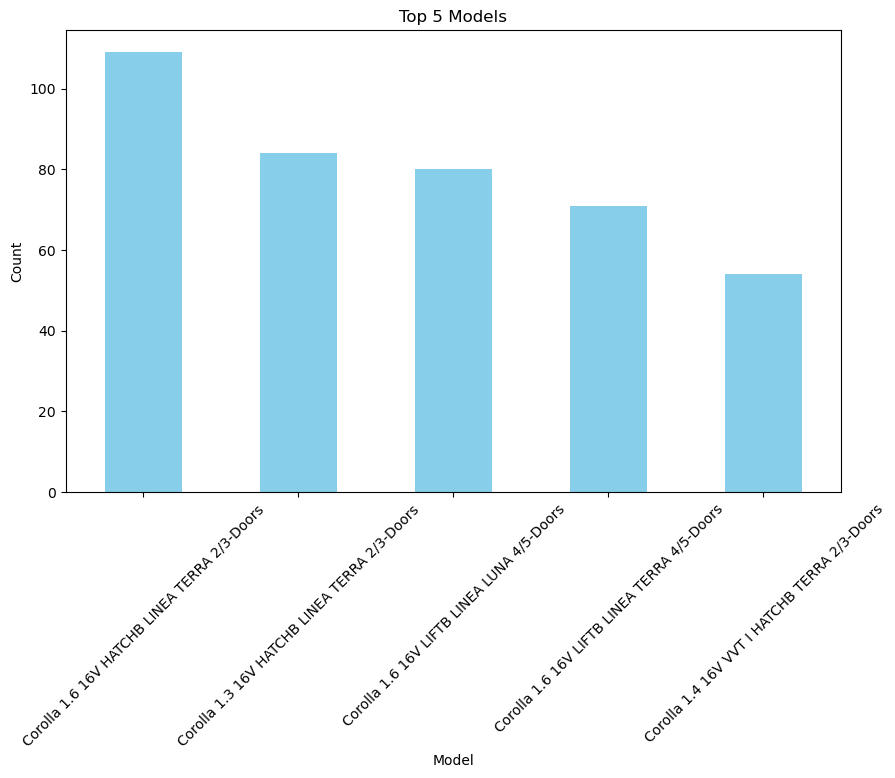

In [361]:
# Count the occurrences of each model
model_counts = df['model'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

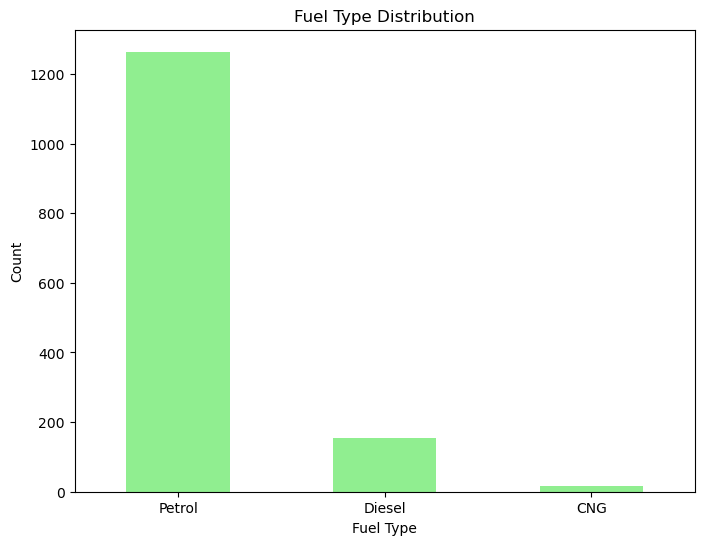

In [362]:

# Count the occurrences of each fuel type
fuel_counts = df['fuel_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
fuel_counts.plot(kind='bar', color='lightgreen')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

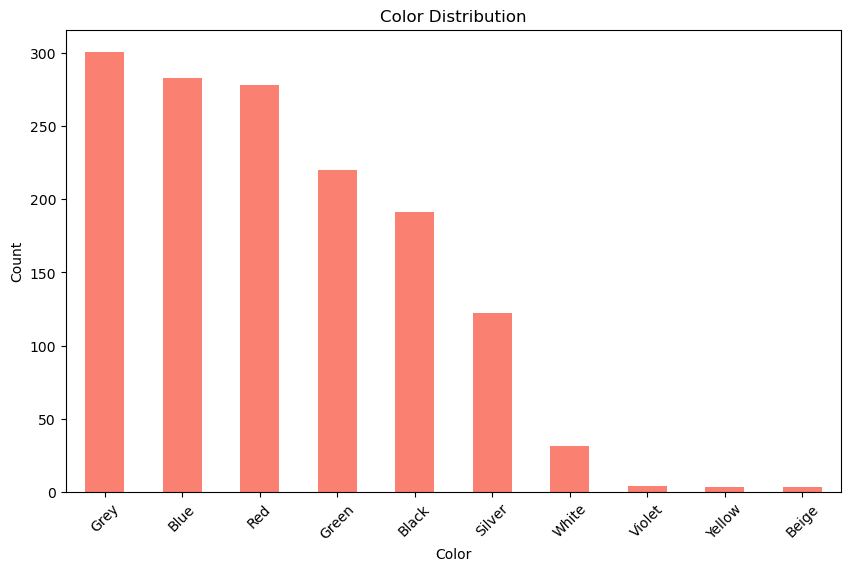

In [363]:
# Count the occurrences of each color
color_counts = df['color'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='salmon')
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

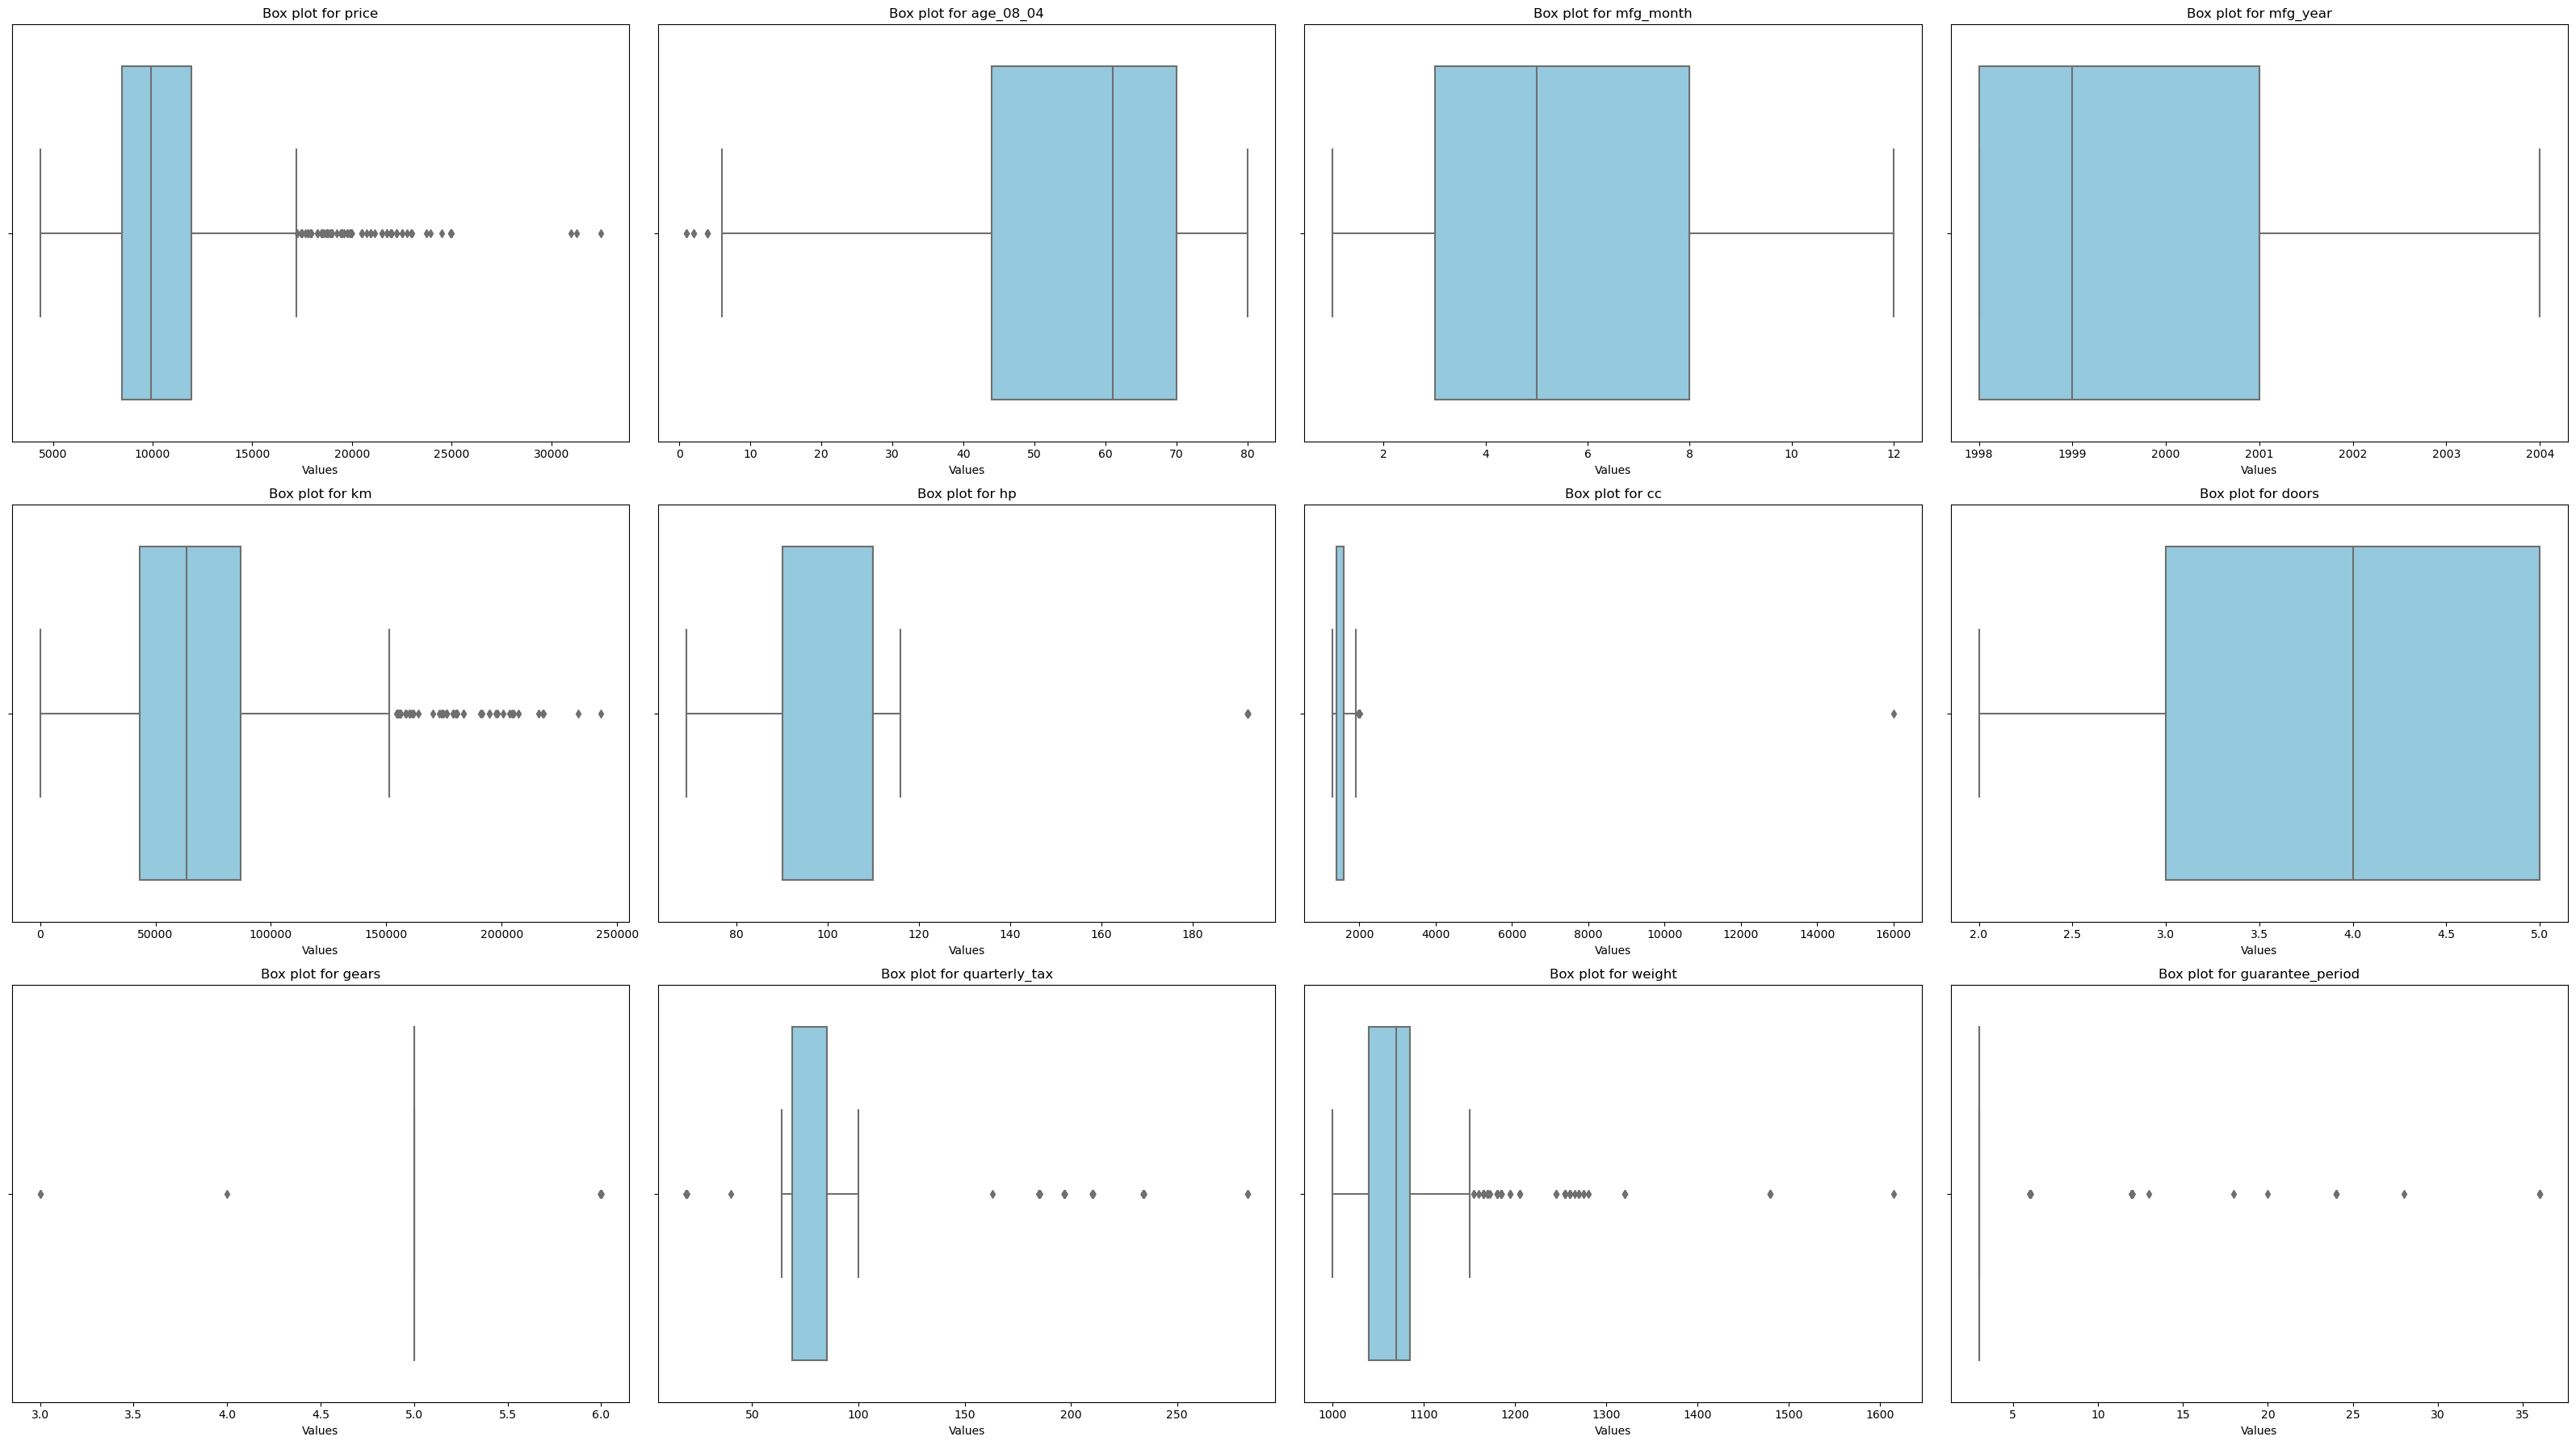

In [364]:
num_rows = 3
num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(num_attribs):
    ax = axes[i]
    sns.boxplot(x=df[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

## 3.2 Bivariate

c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


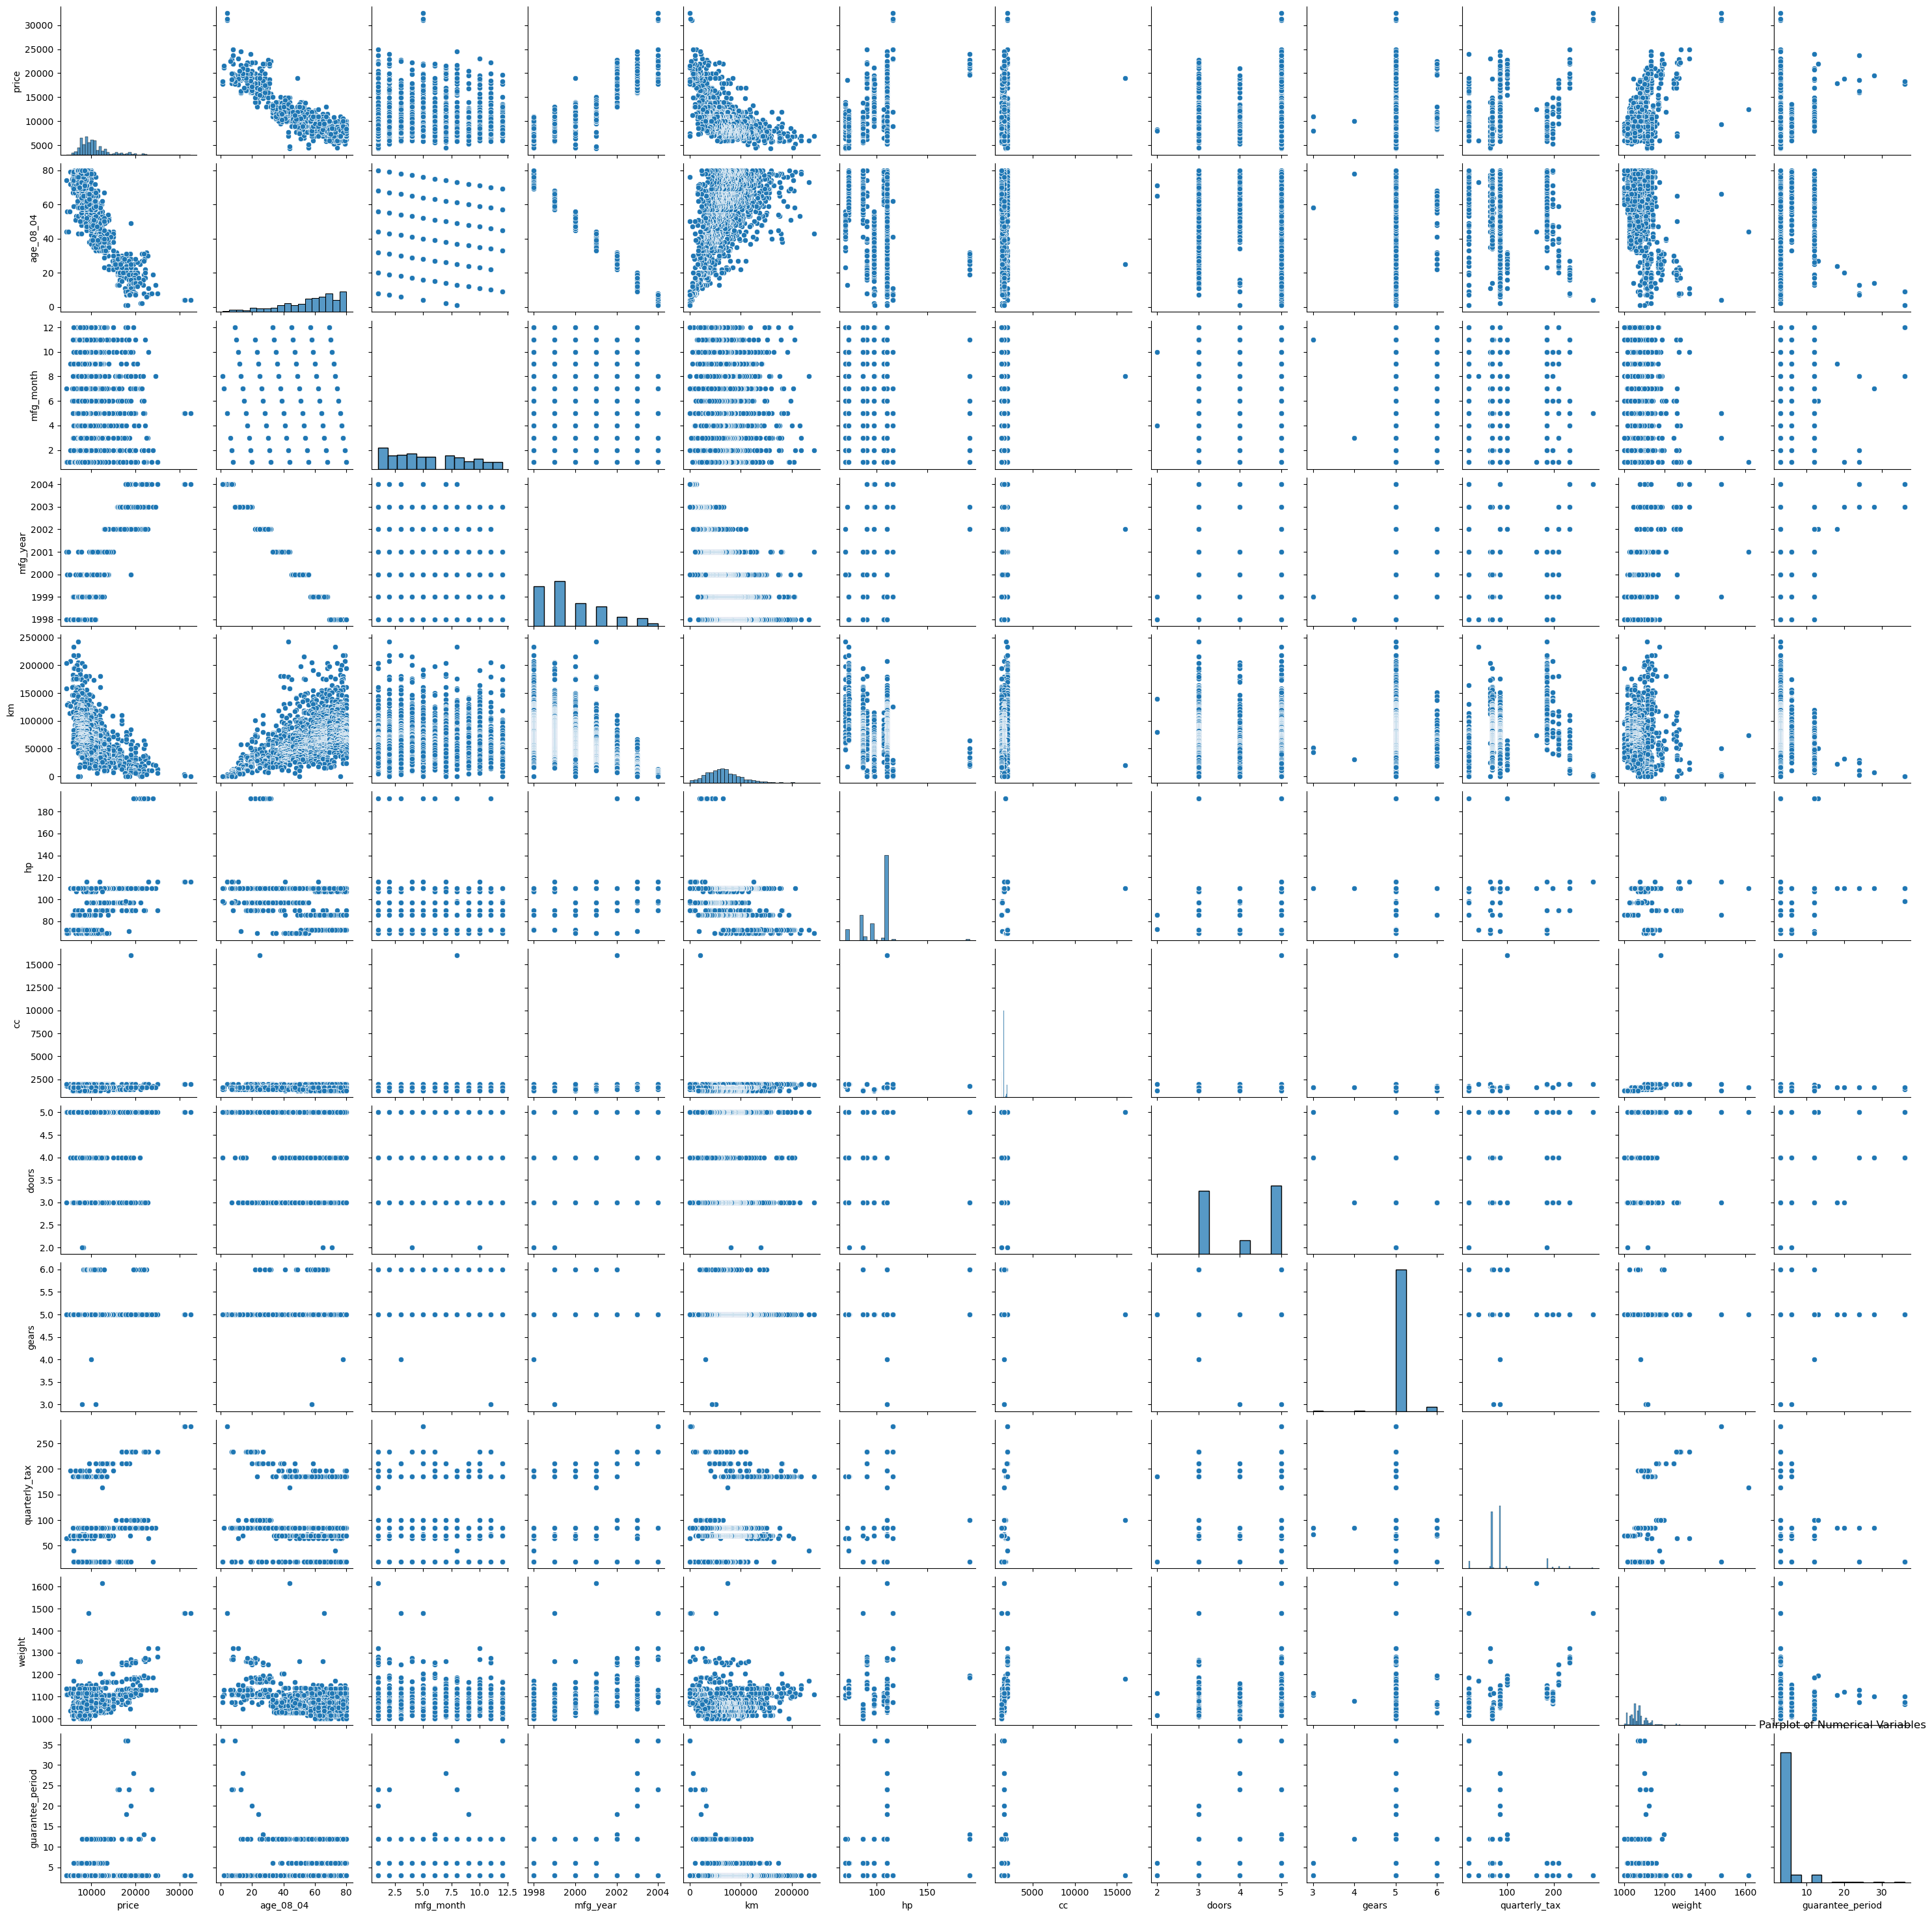

In [365]:
sns.pairplot(df[num_attribs])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [366]:
## Price seems to have negative correlation with age and km, which make sense

In [367]:
def plot_distribution_curves(df, columns, hue_column):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue column using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_column (str): Column to use for coloring the distribution curves.

    Returns:
        None
    """
    colors = sns.color_palette("husl", len(df[hue_column].unique()))
    
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=2, ncols=num_plots // 2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, col in enumerate(columns):
        for j, value in enumerate(df[hue_column].unique()):
            sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
        axes[i].set_title(f"Distribution of {col} by {hue_column}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        axes[i].legend(df[hue_column].unique(), title=hue_column)

    plt.tight_layout()
    plt.show()

C:\Users\m.pham\AppData\Local\Temp\ipykernel_20628\2769552773.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
C:\Users\m.pham\AppData\Local\Temp\ipykernel_20628\2769552773.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])


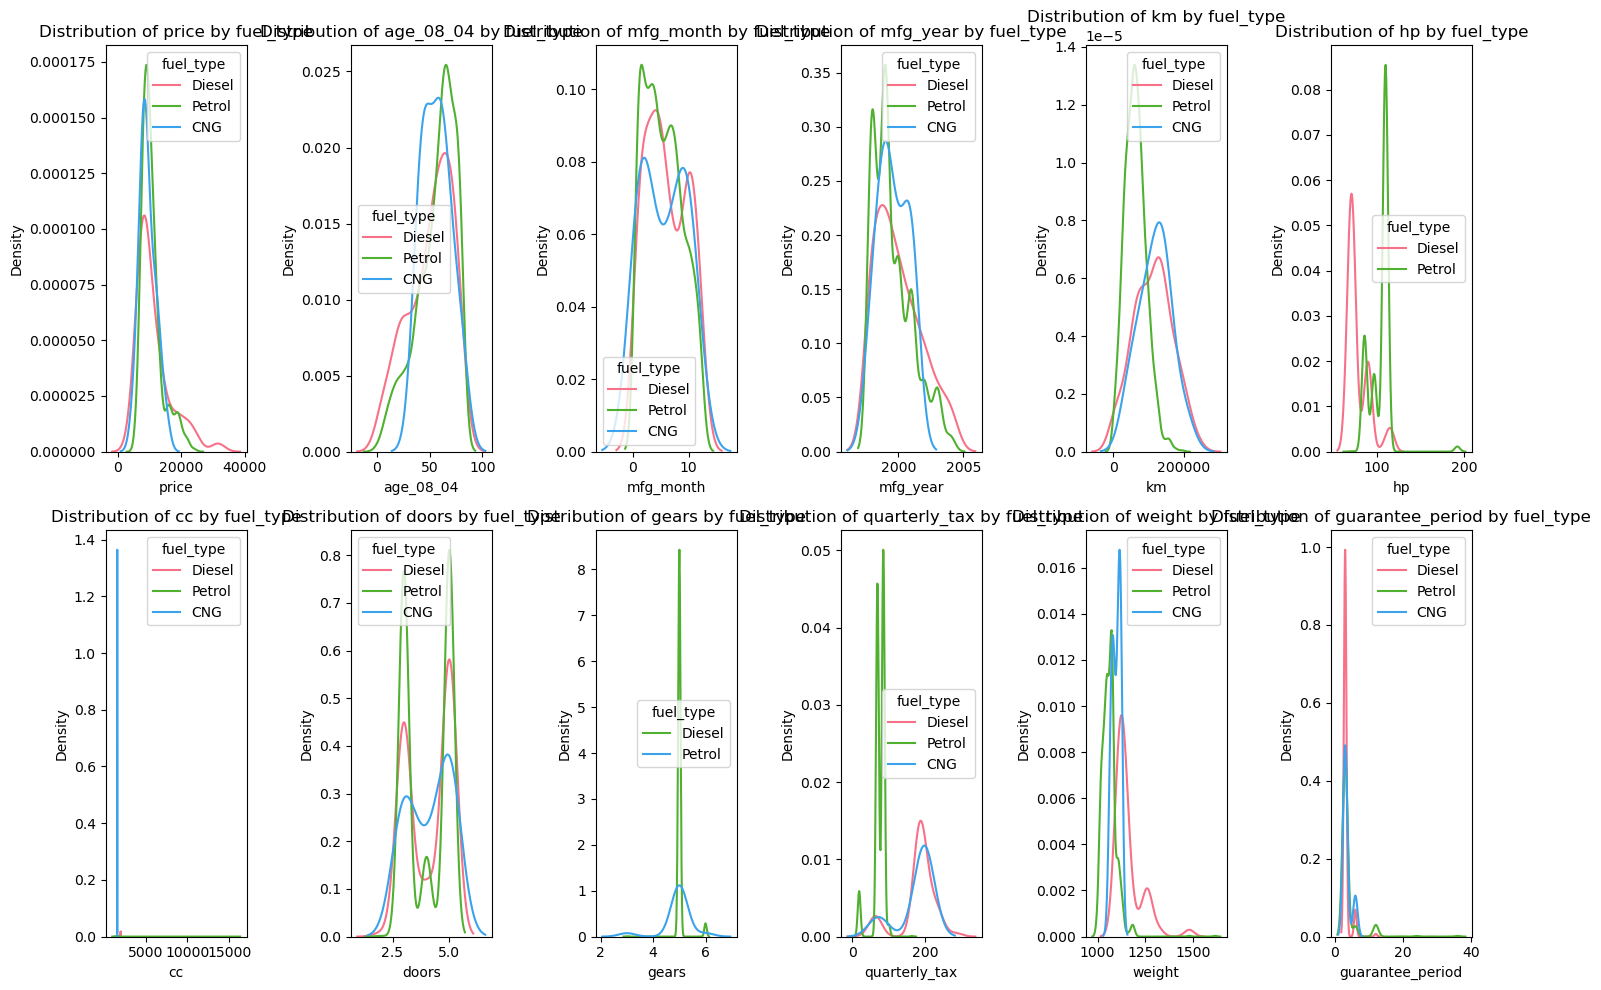

In [368]:
plot_distribution_curves(df, num_attribs, 'fuel_type')

## 3.3 Multivariate

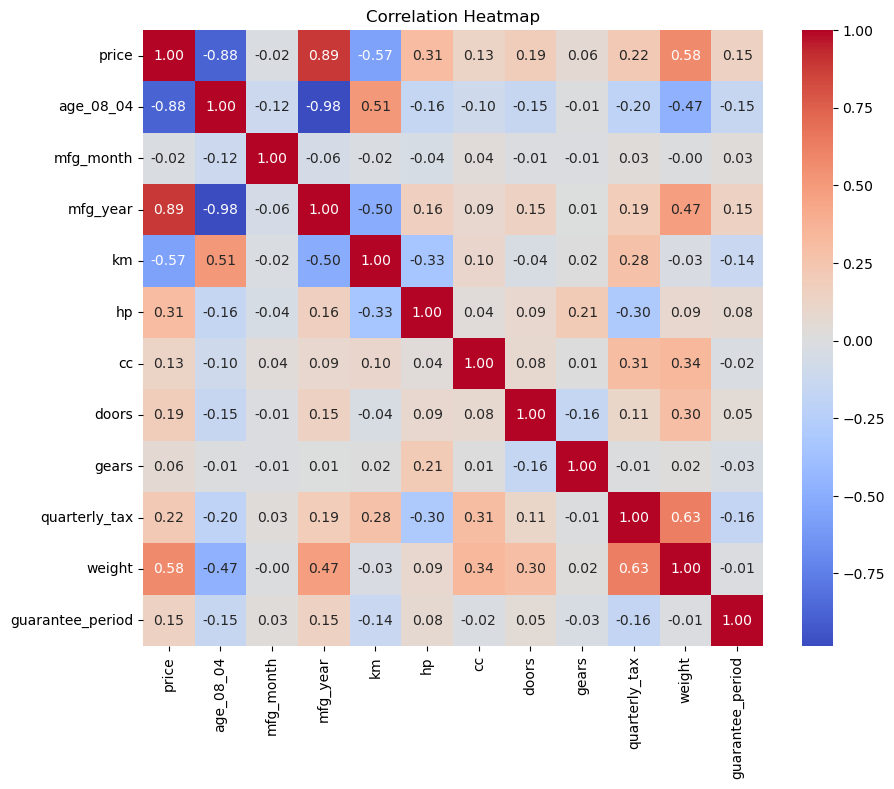

In [369]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_attribs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 4. Split Train Test For Modelling

In [370]:
df.drop(columns = ['id'], inplace = True)

## Handle Outlier Before Train

In [371]:
# Remove Outlier
def remove_outliers(df, column_names=None, threshold=1.5):
    """
    Remove outliers from specific columns in the DataFrame based on the interquartile range (IQR) method,
    or remove outliers from all numerical columns if column_names is None.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_names: list or None, default None
        The list of column names for which outliers are to be removed,
        or None to remove outliers from all numerical columns.

    Returns:
    - df_filtered: DataFrame
        The DataFrame with outliers removed.
    """
    if column_names is None:
        num_attribs = df.select_dtypes(include='number').columns
    else:
        num_attribs = column_names

    total_removed = 0
    total_rows = len(df)

    for col in num_attribs:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers from the specified column
        removed_rows = len(df) - len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])
        total_removed += removed_rows

        # Update DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Print the number and percentage of removed values if any rows have been removed
        percentage_removed = (removed_rows / total_rows) * 100
        print(f"Removed {removed_rows} rows ({percentage_removed:.2f}%) due to outliers in column '{col}'.")

    return df

In [372]:
df = remove_outliers(df, ['price'])

Removed 110 rows (7.66%) due to outliers in column 'price'.


<Axes: >

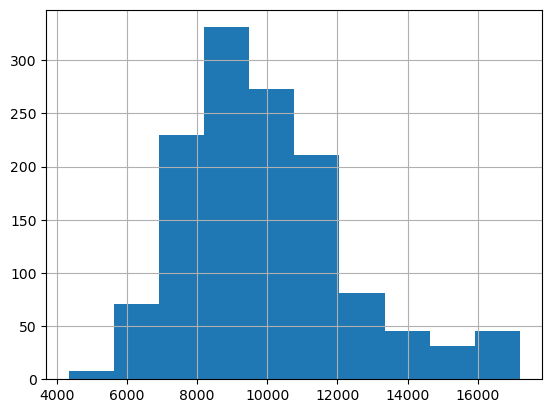

In [373]:
df['price'].hist()

In [374]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [375]:
train = train_set.drop("price", axis=1)
train_labels = train_set["price"].copy()

In [376]:
train_num = train.drop(columns= cat_attribs)
train_cat = train[cat_attribs].copy()

In [377]:
train_labels

279     14990
379      6400
1000     8950
318      9900
831      9900
        ...  
1205     6750
1240     8750
1404     8500
970      9950
1236     7450
Name: price, Length: 1060, dtype: int64

In [378]:
train_num.head(3)

,age_08_04,mfg_month,mfg_year,km,hp,met_color,automatic,cc,doors,cylinders,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
279,38,7,2001,46327,110,1,0,1600,3,4,...,1,1,0,1,0,1,1,0,0,0
379,51,6,2000,198167,69,0,0,1900,4,4,...,1,1,1,0,0,1,0,1,0,0
1000,60,9,1999,40000,86,1,0,1300,4,4,...,0,1,0,0,0,0,0,0,0,0


In [379]:
train_cat.head(3)

,model,fuel_type,color
279,Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors,Petrol,Black
379,Corolla 1.9 D SEDAN TERRA 4/5-Doors,Diesel,Red
1000,Corolla 1.3 16V SEDAN LINEA TERRA 4/5-Doors,Petrol,Blue


# 4. Data Cleaning for Modelling

## 4.1 Handle Nulls

In [380]:
# Count null values in each column
null_counts = train_set.isnull().sum().sum()

null_counts
# # Filter columns with more than zero null values
# null_counts_gt_zero = null_counts[null_counts > 0]

# # Plotting the null counts
# plt.figure(figsize=(10, 6))
# null_counts_gt_zero.plot(kind='bar', color='skyblue')
# plt.title('Count of Null Values in DataFrame Columns (Columns with >0 Nulls)')
# plt.xlabel('Columns')
# plt.ylabel('Count of Null Values')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()

0

## 4.2 Handle Outliers 

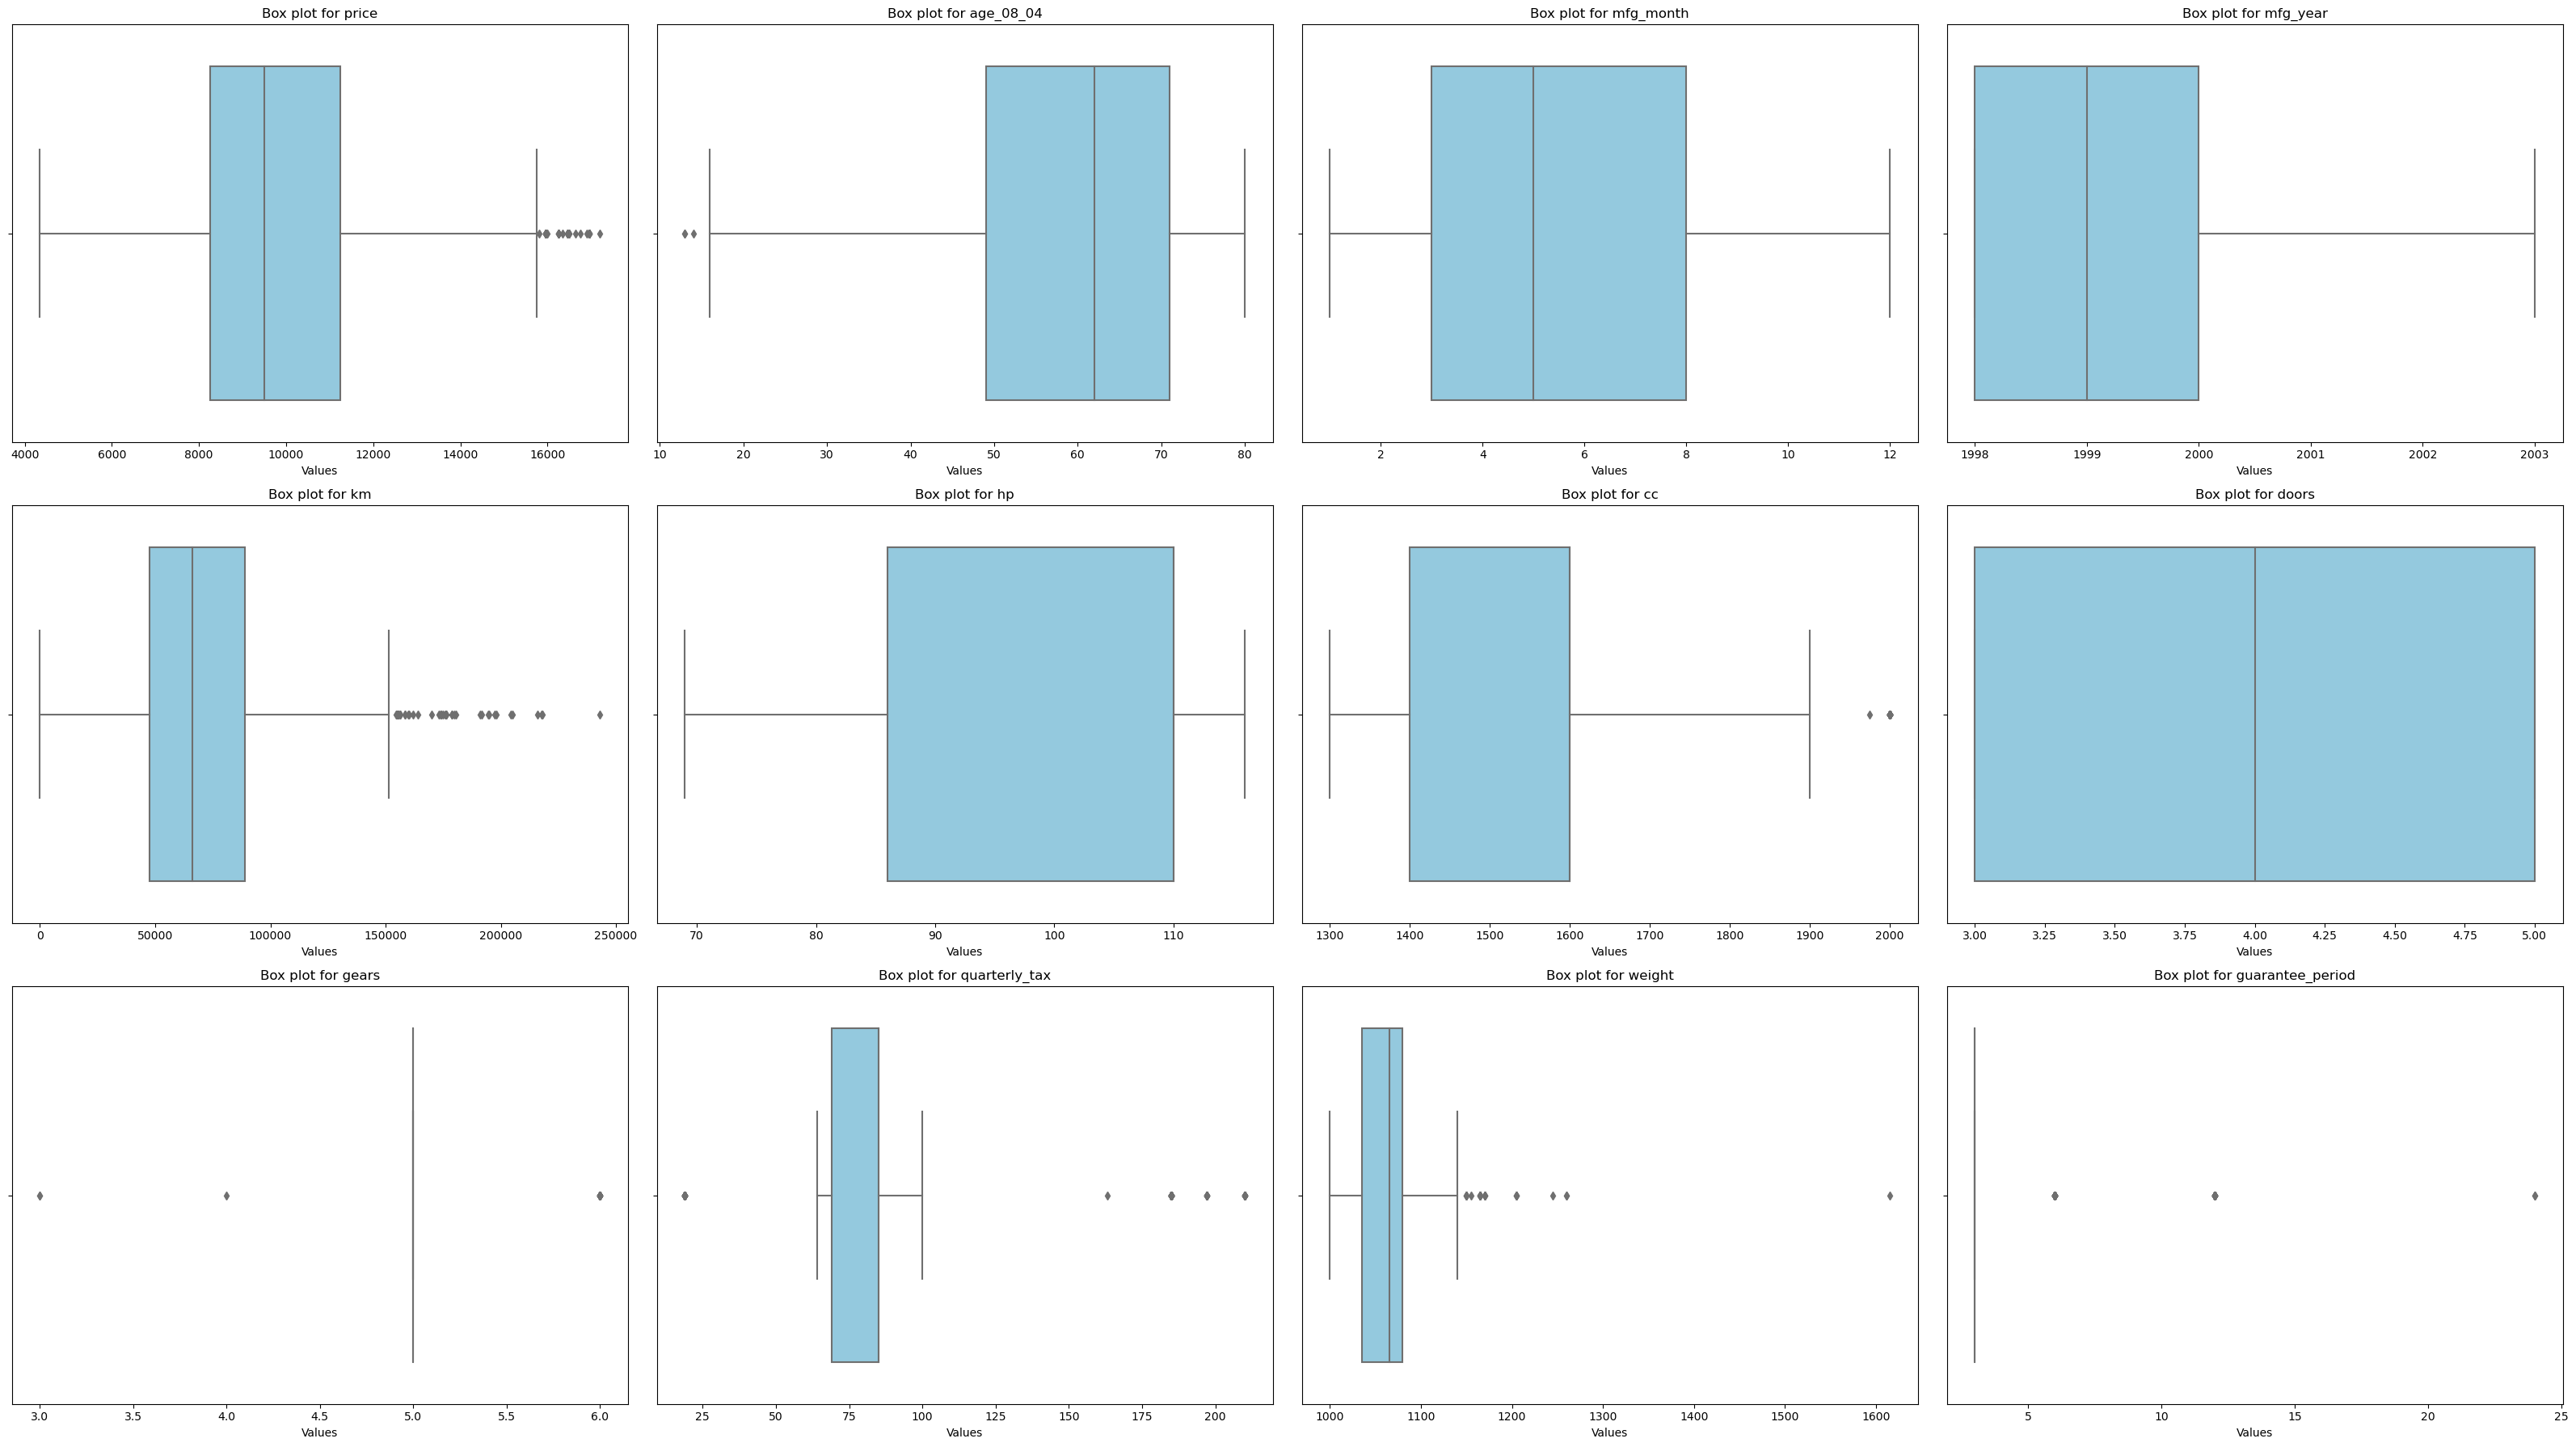

In [381]:
num_rows = 3
num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(num_attribs):
    ax = axes[i]
    sns.boxplot(x=train_set[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [382]:
train_set = remove_outliers(train_set, column_names = ['cc','hp', 'weight'], threshold=2)

Removed 0 rows (0.00%) due to outliers in column 'cc'.
Removed 0 rows (0.00%) due to outliers in column 'hp'.
Removed 8 rows (0.75%) due to outliers in column 'weight'.


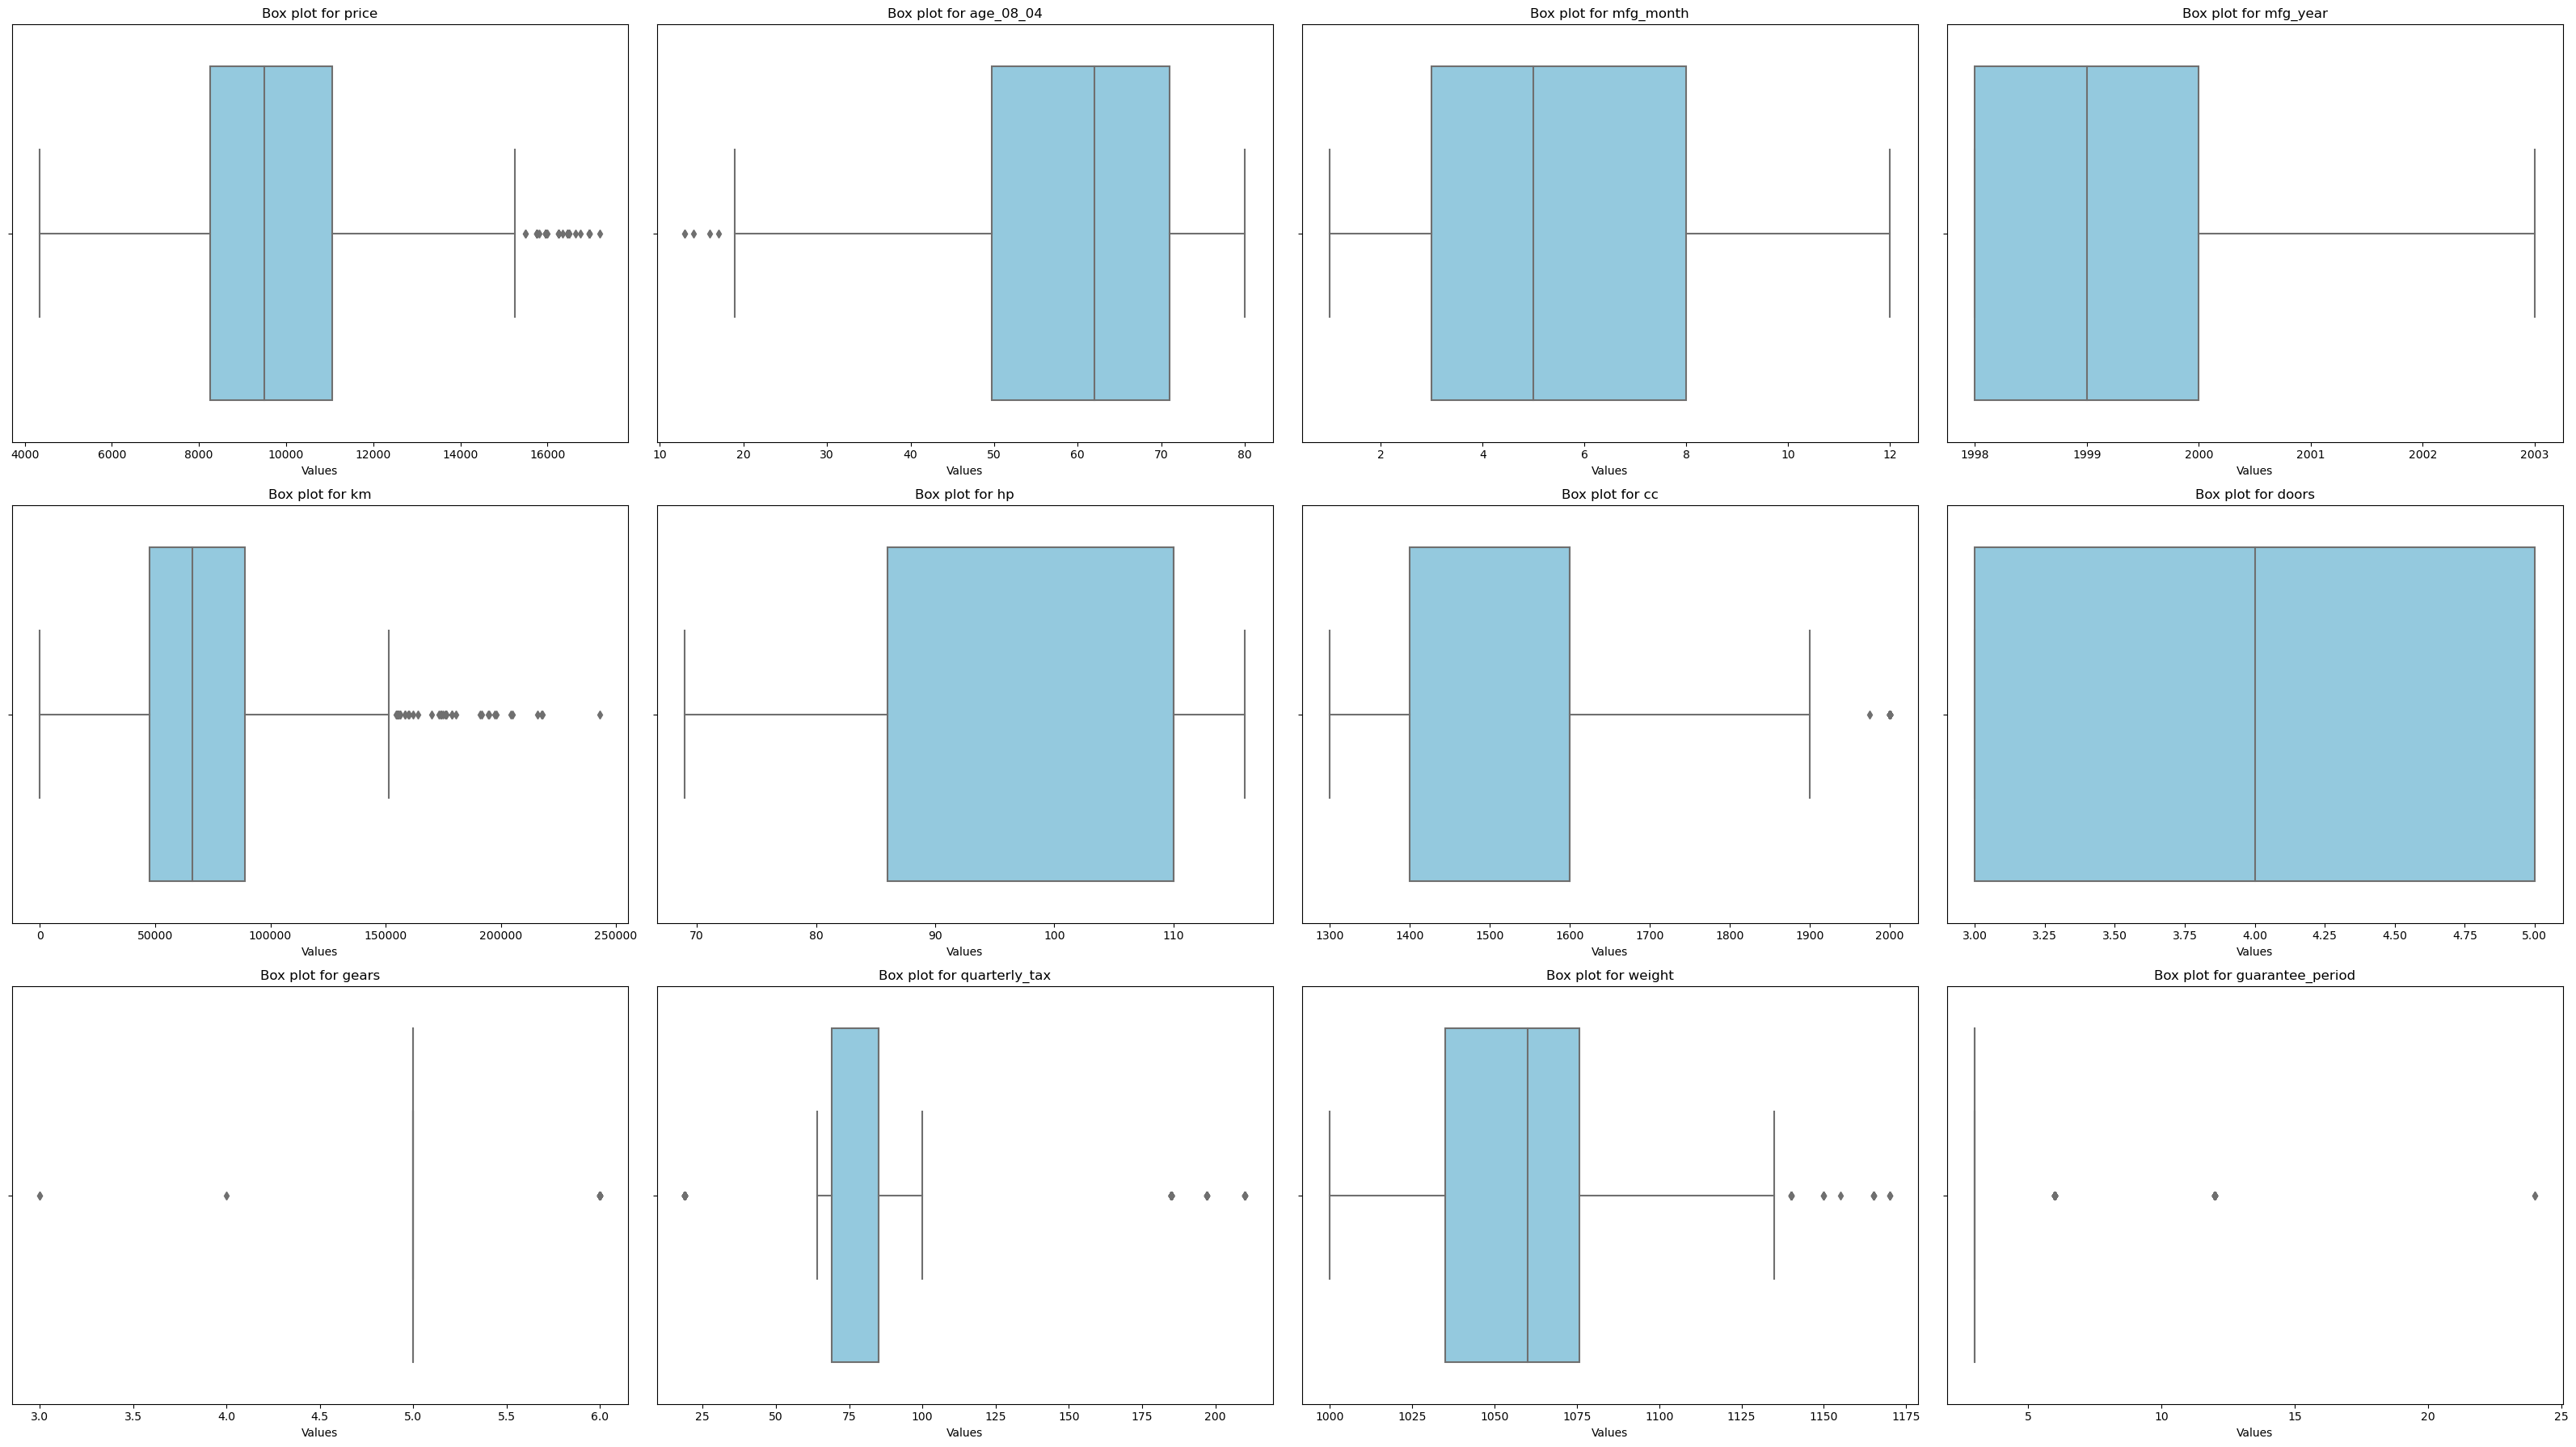

In [383]:
num_rows = 3
num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(num_attribs):
    ax = axes[i]
    sns.boxplot(x=train_set[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# 5.Preprocess Data 

## Transformation Pipelines

In [384]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


In [385]:
num_pipeline = Pipeline([
 # ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])

In [386]:
from sklearn.compose import ColumnTransformer

In [387]:
train.head()

,model,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,automatic,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
279,Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors,38,7,2001,46327,Petrol,110,1,Black,0,...,1,1,0,1,0,1,1,0,0,0
379,Corolla 1.9 D SEDAN TERRA 4/5-Doors,51,6,2000,198167,Diesel,69,0,Red,0,...,1,1,1,0,0,1,0,1,0,0
1000,Corolla 1.3 16V SEDAN LINEA TERRA 4/5-Doors,60,9,1999,40000,Petrol,86,1,Blue,0,...,0,1,0,0,0,0,0,0,0,0
318,Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors,42,3,2001,37000,Petrol,97,1,Green,0,...,0,1,0,0,0,1,0,0,0,0
831,Corolla 1.3 16V WAGON LINEA TERRA Stationwagen,63,6,1999,68238,Petrol,86,0,Red,0,...,0,1,0,0,0,1,0,0,0,0


In [388]:
num_attribs.remove("price")

In [389]:
num_attribs

['age_08_04',
 'mfg_month',
 'mfg_year',
 'km',
 'hp',
 'cc',
 'doors',
 'gears',
 'quarterly_tax',
 'weight',
 'guarantee_period']

In [390]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs + bin_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
train_prepared = full_pipeline.fit_transform(train)


In [391]:
train.columns

Index(['model', 'age_08_04', 'mfg_month', 'mfg_year', 'km', 'fuel_type', 'hp',
       'met_color', 'color', 'automatic', 'cc', 'doors', 'cylinders', 'gears',
       'quarterly_tax', 'weight', 'mfr_guarantee', 'bovag_guarantee',
       'guarantee_period', 'abs', 'airbag_1', 'airbag_2', 'airco',
       'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
       'powered_windows', 'power_steering', 'radio', 'mistlamps',
       'sport_model', 'backseat_divider', 'metallic_rim', 'radio_cassette',
       'parking_assistant', 'tow_bar'],
      dtype='object')

In [392]:
train_prepared

<1060x270 sparse matrix of type '<class 'numpy.float64'>'
	with 38160 stored elements in Compressed Sparse Row format>

# 6. Select and Train a Model

## 6.1 Training and Evaluating on the Training Set

In [393]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [394]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [14081.69546907  7637.67448127  8948.42130033 11097.60665552
  9931.61828879]
Labels: [14990, 6400, 8950, 9900, 9900]


In [395]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

705.4068471717553

In [396]:
lin_reg.score(train_prepared,train_labels)

0.9105227006491815

## 6.2 Better Evaluation Using Cross-Validation

In [397]:
from sklearn.model_selection import cross_val_score

In [398]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [399]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [1150.48861158 1077.37871745  968.03330688 1022.44625244 1324.87313991
 1399.09658778  958.15179326 1127.46209114 1529.94313463 1049.201008  ]
Mean: 1160.7074643059282
Standard deviation: 183.83962212572143
